In [ ]:
'''
1. Create the population

2. Determine fitness

3. Select the mating pool

4. Breed

5. Mutate

6. Repeat'''

In [ ]:
'''
1.Initialization - Create an initial population. This population is usually randomly generated and can be any desired size,
from only a few individuals to thousands.
2.Evaluation - Each member of the population is then evaluated and we calculate a 'fitness' for that individual. 
The fitness value is calculated by how well it fits with our desired requirements. These requirements could be simple, 
'faster algorithms are better', or more complex, 'stronger materials are better but they shouldn't be too heavy'.
3.Selection - We want to be constantly improving our populations overall fitness. Selection helps us to do this by 
discarding the bad designs and only keeping the best individuals in the population.  There are a few different selection 
methods but the basic idea is the same, make it more likely that fitter individuals will be selected for our next generation.
4.Crossover - During crossover we create new individuals by combining aspects of our selected individuals. We can think of 
this as mimicking how sex works in nature. The hope is that by combining certain traits from two or more individuals we 
will create an even 'fitter' offspring which will inherit the best traits from each of it's parents.
5.Mutation - We need to add a little bit randomness into our populations' genetics otherwise every combination of solutions 
we can create would be in our initial population. Mutation typically works by making very small changes at random to an 
individuals genome.
6.And repeat! - Now we have our next generation we can start again from step two until we reach a termination condition.

'''

In [ ]:
'''
pop= list of passwords
fit func= difference between char
selection= choose only 20% of the best passwords
breed= select a subset of the first parent string and then fill the remainder of the route with the genes from the second parent
mutate= select 1% of pop. to have mutation
repeat.
'''


In [1]:
true_pass=[1,2,3,4,0,5,2,9,7,3,5,6]

In [2]:
#Defining an initial population
import random
from operator import itemgetter
import math
from random import shuffle
import matplotlib.pyplot as plt

def pop(amount): #amount is the pop. size
    initial_population=[] #list of passwords
    for i in range(0,amount):
        password=[]
        for i in range (0,len(true_pass)): #adding 5 numbers here
            password.append(random.randint(0,9)) #each of value 0-9 
        initial_population.append(password)  
    return initial_population

In [3]:
#Define fittness function

#I'll sum the differences between each char. of an individual and the char of the true password
#Each password will get a score based on the sum (lowest score is better- meaning there's less difference between chars.)

def fit(password): #password is a list of characters
    password_sum=0
    index=0
    for x in password:
        password_sum+=abs(true_pass[index]-x)
        index+=1    
    return password_sum #return the score for each password

In [60]:
#Define a list to hold the password and its score- we will choose only the best ones with a max function
def selection (population):
    pass_and_score=[] 
    for every_password in population:
        pass_and_score.append([every_password,fit(every_password)])

    #pass_and_score #[password, score]
    
    #organize them by the score (lowest score first to indicate closest password)
    organized_pass_and_score= sorted(pass_and_score, key=lambda x: int(x[1]))
    
    #Take only the top % of the passwords
    best_passwords=organized_pass_and_score[:math.ceil(0.1*(len(organized_pass_and_score)))] #keep 10% here (dont forget to change the children later to keep the original size)
    only_best_passwords=[]
    for i in range (len(best_passwords)):
        only_best_passwords.append(best_passwords[i][0])
    return only_best_passwords

In [61]:
#Breed/ crossover - creating the next generation passwords
def breed(parent1, parent2):
    child = []

    for i in range (len(parent1)): #fill random nums in child
        child.append(random.randint(0,9))
     #   print(child)
    index=random.randint(0,len(parent1)) #fill first part with parent 1
    #print(index)
    for i in range(0,index):
        child[i]=parent1[i]
    for j in range(index,len(parent1)): #fill second part with parent 2
        child[j]=parent2[j]
    return child

In [62]:
#Create the population of children
def breedPopulation(parents): #change num_of_parents #num of parents is len(best_passwords)
    children=[]
    count=0
    while count<len(parents): #change to num_of_parents
        for i in range (int(len(parents)*8)): #each pair of parents have 8 kids to keep to original population size of 100 (20 parents + 80 kids)
            children.append(breed(parents[count],parents[count+1]))
        count+=2
    return children

In [63]:
#Mutate- Choose a random number of children. For each child choose a random char. to change.
def mutate(children,percentage): #enter the % of mutations
    num_of_mutated_children=math.ceil((percentage/100)*len(children))
    shuffle(children)

    for i in range(num_of_mutated_children):
        children[i][random.randint(0,len(children[0])-1)]=random.randint(0,9)
    return children

In [64]:
#Repeat
def nextGeneration(currentGen, mutationRate):
    selectionResults = selection(currentGen) #select the best from the current gen.
    children=breedPopulation(selection(selectionResults)) #from the best create children
    mutated_children=mutate(children,mutationRate) #mutate the children
    nextGeneration = mutated_children+selectionResults #nextGen is the kids plus their parents
    return nextGeneration #get the next population with size 100

In [65]:
#Evolution in motion
def geneticAlgorithm(popSize, mutationRate, generations): 
    print('True password was: ' +str(true_pass))
    initial_population = pop(popSize)
    progress=[]
    for i in range(0, generations):
        new_population = nextGeneration(initial_population, mutationRate)
        top_pass=selection(new_population)[0]
        score=fit(selection(new_population)[0])
        progress.append(score)
        #print("Top password currently is: " + str(top_pass)+' and its score: '+ str(score))
        if score==0:
            print('Gotcha the current password in  ' +str(i)+' iterations, '+ 'and it is: ' +str(top_pass))
            break 
    plt.plot(progress)
    plt.ylabel('Distance from true pass')
    plt.xlabel('Generation')
    plt.show()

    top_pass=selection(new_population)[0]
    return ('Best I coult do is: ' +str(top_pass))

True password was: [1, 2, 3, 4, 0, 5, 2, 9, 7, 3, 5, 6]


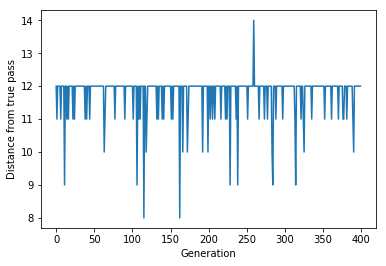

'Best I coult do is: [5, 4, 5, 4, 0, 5, 3, 9, 5, 3, 5, 7]'

In [69]:
#Running the genetic algorithm
geneticAlgorithm(1000,10,400)